# **CMSC 691 : Introduction to Data Science under Dr. Tim Oates in Fall 2020**


>AMBROSE TUSCANO  

>RE90613 

>UMBC MSCS Dec'21












#**Homework 1**
##*Assigned: September 1st (Tuesday)*
##*Due: September 15th (Tuesday) by 11:30am* 

> [Homework website](https://www.csee.umbc.edu/courses/graduate/CMSC691/ds_fall20/homework.html)





---



Import libraries

In [1]:
import pandas as pd 
from math import ceil
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(20,15), 'figure.dpi':100})

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1:

> 
Load the data into a Jupyter notebook. 
Explain briefly (using markdown) what the dataset contains or what it is about. Do a head(50) and tail(50) on the data frame after loading the data. 
Explain any observations you can make about the dataset and its quality from just that output.





---












In [2]:
elec_df = pd.read_csv("/content/IndainLoksabhaElections.csv")

**Context:** With over 600 Million voters voting for 8500+ candidates across 543 constituencies, the general elections in the world's largest democracy are a potential goldmine of data. While there are existing separate datasets about the votes each candidate received and the personal information of each candidate, there was no comprehensive dataset that included both these information. Thus, this dataset will provide more usability than most existing datasets in this domain.
Taken from Kaggle [ Indian Loksabha Election 2019 Dataset](https://www.kaggle.com/prakrutchauhan/indian-candidates-for-general-election-2019)

In [3]:
print('Number of Rows    : \t ', str(elec_df.shape[0])+'\n'+'Number of Columns : \t ', str(elec_df.shape[1]))

Number of Rows    : 	  2263
Number of Columns : 	  19


In [4]:
elec_df.dtypes

STATE                                         object
CONSTITUENCY                                  object
NAME                                          object
WINNER                                         int64
PARTY                                         object
SYMBOL                                        object
GENDER                                        object
CRIMINAL\nCASES                              float64
AGE                                          float64
CATEGORY                                      object
EDUCATION                                     object
ASSETS                                        object
LIABILITIES                                   object
GENERAL\nVOTES                                 int64
POSTAL\nVOTES                                  int64
TOTAL\nVOTES                                   int64
OVER TOTAL ELECTORS \nIN CONSTITUENCY        float64
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY    float64
TOTAL ELECTORS                                

In [5]:
elec_df.columns

Index(['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'SYMBOL', 'GENDER',
       'CRIMINAL\nCASES', 'AGE', 'CATEGORY', 'EDUCATION', 'ASSETS',
       'LIABILITIES', 'GENERAL\nVOTES', 'POSTAL\nVOTES', 'TOTAL\nVOTES',
       'OVER TOTAL ELECTORS \nIN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY', 'TOTAL ELECTORS'],
      dtype='object')

The Dataset holds varied information about a paprticular candidate. It ranges from Votes gained to Criminal Cases. 

**Brief Details on Columns:**

1) State*(str)*: Contains information on the State of the particular Electorate is located. Ex: Maharashtra, Madhya Pradesh, Kerala

2) Constituency*(str)*  : Electoral Area, can be considered similar to County in the USA.

3) Name *(str)* : Name of the Candidate

4) Winner *(int)* : In 1/0 shows if the candidate won/lost.

5) Party *(str)*  : Consider it similar to Democratic and Republic 

6) Symbol *(str)*  : Symbol affiliated to the candidate or Party he is representing

7) Gender *(str)*  : Sex of the candidate. Keep in mind that in remote part of India that matters too a lot. Can be an important facter for classification algorithms.

8) CRIMINAL\nCASES *(str)* : Gives number of Charges against the candidate. Top notch Politicians tend to have some criminal background they are associated with. 

9) Age *(int)* : Age of candidate.

10) Category *(str)* : Based on caste system prevalent in India. An important factor none the less. There are some slots alloted for particular castes during each year. Scheduled Caste (SC) and Scheduled Tribes (ST), and more are included here

11) Education *(str)* : Gives scholarly background information of the candidate. Levels like Post Graduate and 12th Pass are included.

12) Assets *(str)* : Shows monetary valuation of the candidate. 

13) Liabilities *(str)* : Shows debt of the candidate.

14) General Votes *(int)* : The votes to a candidate done over electoral voting machines in allocated locations.

15) Postal Votes *(int)* : The votes to sent by mail for particular candidate.(Usually done for electors who are serving out of state for goverment affliated services)

16) Total Votes *(int)* : The total votes gained by particular candidate.

17) Over total electors in constituency *(int)* : This determines how many percentage of votes over the total voters in the electoral area voted for the candidate. 

18) Over total votes polled in constituency *(int)* : This determines how many percentage of votes over the total people who turned up to vote in the electoral area voted for the candidate. 


A good article about the reasons for low turnaround of voters and issues it might lead to is : 
[link text](https://theprint.in/opinion/why-voters-dont-turn-up-in-large-numbers-in-lok-sabha-elections-all-politics-is-local/204344//)

More on Voter Turnaround at [link text](https://en.wikipedia.org/wiki/Voter_turnout)

19) Total Electors *(int)* : Total number of voters in the electoral area.  

In [6]:
#head 50
elec_df.head(50) 

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52.0,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0.0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3.0,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5.0,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0.0,47.0,SC,Post Graduate,"Rs 13,37,84,385\n ~ 13 Crore+","Rs 2,22,51,891\n ~ 2 Crore+",434199,1130,435329,22.466390,37.999125,1937690
6,Uttar Pradesh,AGRA,Preeta Harit,0,INC,Hand,FEMALE,0.0,54.0,SC,Post Graduate,"Rs 5,50,75,753\n ~ 5 Crore+",Rs 0\n ~,44877,272,45149,2.330042,3.940979,1937690
7,Maharashtra,AHMADNAGAR,Dr. SUJAY RADHAKRISHNA VIKHEPATIL,1,BJP,Lotus,MALE,0.0,37.0,GENERAL,Doctorate,"Rs 16,86,64,576\n ~ 16 Crore+","Rs 26,23,964\n ~ 26 Lacs+",696961,7699,704660,37.856533,58.425159,1861396
8,Maharashtra,AHMADNAGAR,SANGRAM ARUNKAKA JAGTAP,0,NCP,Clock,MALE,1.0,34.0,GENERAL,Graduate,"Rs 9,44,88,381\n ~ 9 Crore+","Rs 3,25,49,132\n ~ 3 Crore+",419364,3822,423186,22.734872,35.087431,1861396
9,Maharashtra,AHMADNAGAR,SUDHAKAR LAXMAN AVHAD,0,VBA,Cup & Saucer,MALE,0.0,62.0,GENERAL,Graduate,"Rs 1,39,49,000\n ~ 1 Crore+","Rs 14,00,000\n ~ 14 Lacs+",31644,163,31807,1.708771,2.637200,1861396


#Observation

Inital observation leads to finding a lot of Null values. 

For a first, values classified as NOTA in the name column, had a lot of NaN values. This was because NOTA, meaning None of the Above is used in Indian constitution as a measure to give voters the flexibility to not vote for any candidate but have their vote counted. More on this at [link text](https://en.wikipedia.org/wiki/None_of_the_above)

This means that it would not have many features(affiliated party, assets, liabilities). And since we are not running any machine Learning algorithm on this data, we can consider removing them to clean the dataframe. This will get rid of the inital NaN values we can observe. 

But , NOTA can be a major difference while running prediction algorithms. For now, lets observe alternative options too. 

We will see what the end of the dataframe has to offer.




In [7]:
#tail 50
elec_df.tail(50)

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
2213,Tamil Nadu,VILUPPURAM,RAVIKUMAR D,1,DMK,Rising Sun,MALE,0.0,58.0,SC,Doctorate,"Rs 65,09,860\n ~ 65 Lacs+","Rs 13,69,031\n ~ 13 Lacs+",556675,2910,559585,38.743436,49.254994,1444335
2214,Tamil Nadu,VILUPPURAM,VADIVEL RAVA S,0,PMK,Mango,MALE,0.0,66.0,SC,Graduate,"Rs 19,25,000\n ~ 19 Lacs+",Rs 0\n ~,430091,1426,431517,29.876518,37.982375,1444335
2215,Tamil Nadu,VILUPPURAM,GANAPATHY N,0,IND,Gift Pack,MALE,0.0,55.0,SC,8th Pass,"Rs 79,53,000\n ~ 79 Lacs+","Rs 21,50,000\n ~ 21 Lacs+",57939,80,58019,4.017004,5.106866,1444335
2216,Tamil Nadu,VILUPPURAM,PRAKALATHA D,0,NTK,Ganna Kisan,FEMALE,1.0,30.0,SC,Post Graduate,"Rs 13,53,000\n ~ 13 Lacs+","Rs 8,00,000\n ~ 8 Lacs+",24480,129,24609,1.703829,2.166098,1444335
2217,Tamil Nadu,VILUPPURAM,ANBIN POYYAMOZHI S,0,MNM,Battery Torch,MALE,1.0,48.0,SC,Post Graduate,"Rs 1,22,000\n ~ 1 Lacs+",Rs 0\n ~,17819,72,17891,1.238702,1.574776,1444335
2218,Tamil Nadu,VILUPPURAM,ARASAN K,0,IND,Jackfruit,MALE,0.0,64.0,SC,Illiterate,"Rs 3,30,000\n ~ 3 Lacs+",Rs 0\n ~,12778,3,12781,0.884906,1.124991,1444335
2219,Tamil Nadu,VILUPPURAM,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11882,61,11943,0.826886,1.051230,1444335
2220,Tamil Nadu,VIRUDHUNAGAR,"MANICKAM TAGORE, B.",1,INC,Hand,MALE,1.0,44.0,GENERAL,Graduate Professional,"Rs 1,72,92,470 \n1 Crore+","Rs 49,53,498\n ~49 Lacs+",464667,6216,470883,31.725188,43.765370,1484256
2221,Tamil Nadu,VIRUDHUNAGAR,"ALAGARSAMY, R.",0,DMDK,Nagara,MALE,3.0,47.0,GENERAL,10th Pass,"Rs 1,26,71,316\n ~ 1 Crore+","Rs 3,38,783\n ~ 3 Lacs+",315055,1274,316329,21.312294,29.400628,1484256
2222,Tamil Nadu,VIRUDHUNAGAR,"PARAMASIVA IYYAPPAN, S.",0,IND,Gift Pack,MALE,0.0,45.0,GENERAL,12th Pass,"Rs 3,52,54,454\n ~ 3 Crore+","Rs 78,36,152\n ~ 78 Lacs+",107033,582,107615,7.250434,10.002082,1484256



#Observation
After Observing the tail too it seems that all NaN values are for the NOTA category. Removing that by using dropna() funtion would be easy to solve this inconsistency, but would indeed let us lose a lot of information. So, I would go about by confirming if the only NaN values are due to NOTA, if yes, will plan on how to handle this inconsistecy.

Other than that, Column names are not properly formatted, so that needs to be handled too. 

Values under Assests and Liabilities columns have not so properly formatted data, which needs to be handled too. This can pretty much be handled by slicing strings by using appropriate lambda functions.






---



2.

> Explore the data to understand what's in each of the columns. If the dataset has a very large number of columns (more than 10) you can choose a smaller subset of columns with which to work, but justify why you selected those columns. For each of the columns, but no more than 5 total columns:
Describe what the column contains (e.g., the time at which a crime was committed, or the last sale price of a house) in prose
Determine whether the column contains missing data, make a decision about how to handle them, and implement that decision
Do the same for outliers or other unusual values. Determine if they exist and, if so, implement an approach to dealing with them
Explain anything else interesting or unusual about the data in the column that you observed



---







Now that we know what the dataset contains, lets explore it to get a better idea. 

But first as mentioned in the Homework requirement, we will drop unnessecary columns to make the work easier. 

Lets see the Columns again and understand why they can be dropped and why some can be used. 

We have to keep in mind that the Homework is for data analysis and exploration and not machine learning models at the moment, so some parameters, though they can make a difference to the election scenario in Indian constituency, we ignore them here. 

Our aim is to find, which party is more prominant in the country.

For this we can start ignoring:


1) State*(str)*: Shouldn't act as a factor and Can be ignored for now

2) Constituency*(str)*  : Much for the same reason as the State

3) Name *(str)* : Can be ignored, since much of the election is won due to the party name. And individual names are just an extra parameter that dont give much info.

4) Winner *(int)* : To be Considered

5) Party *(str)*  : To be Considered, as it gives info about political affiliations and can substitute for State and Constituency columns 

6) Symbol *(str)*  : Almost reduntant to the Party column(Most parties in India follow a strict rule of Having party symbol as personal symbol)

7) Gender *(str)*  : To be Considered, as it is certainnly an important factor

8) CRIMINAL\nCASES *(str)* : To be Considered, as it could help check background of the politician

9) Age *(int)* : To be Considered

10) Category *(str)* : Though it is important, as an ideal scenario this can be neglected

11) Education *(str)* : To be Considered, as it gives more information of the candidate

12) Assets *(str)* : Ignored as we are not focusing on monetary status

13) Liabilities *(str)* : Ignored, for the same reason as assets.

14) General Votes *(int)* : Ignored, as we are taking into consideration the percentage of votes a candidate has over people who voted in the constituency

15) Postal Votes *(int)* : Ignored, as we are taking into consideration the percentage of votes a candidate has over people who voted in the constituency

16) Total Votes *(int)* : Ignored, as we are taking into consideration the percentage of votes a candidate has over people who voted in the constituency

17) Over total electors in constituency *(int)* : Ignored, as we are taking into consideration the percentage of votes a candidate has over people who voted in the constituency

18) Over total votes polled in constituency *(int)* : To be considered, as this is a determining factor as to how many people turned up to vote for a particular candidate

19) Total Electors *(int)* : Ignored, as we are taking into consideration the percentage of votes a candidate has over people who voted in the constituency


So we will be considering : Winner, Party, Gender, Criminal Cases, Education, Age, Total percent of votes casted. Intotal 7 rows

In [8]:
daf = elec_df[['PARTY','AGE','EDUCATION','GENDER','CRIMINAL\nCASES','OVER TOTAL VOTES POLLED \nIN CONSTITUENCY','WINNER']]


In [9]:
daf.head()

,PARTY,AGE,EDUCATION,GENDER,CRIMINAL\nCASES,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,WINNER
0,BJP,52.0,12th Pass,MALE,52.0,35.468248,1
1,TRS,54.0,Post Graduate,MALE,0.0,29.964370,0
2,INC,52.0,12th Pass,MALE,3.0,29.534285,0
3,NOTA,NaN,NaN,NaN,NaN,1.225214,0
4,BJP,58.0,Doctorate,MALE,5.0,56.464615,1


Here we successfully drop unnecessary columns for our analysis and will proceed further preprocessing and  exploring the data in hand. 

daf will be the new dataframe that we will work on from now. daf dataframe has all the previous issues we had. So we will start by step by step approach. First we will set appropriate column names.

In [10]:
daf = daf.rename(columns = {'CRIMINAL\nCASES':'CRIMINAL_CASES','OVER TOTAL VOTES POLLED \nIN CONSTITUENCY':'VOTERS_TURNAROUND'}) 

In [11]:
daf.head()

,PARTY,AGE,EDUCATION,GENDER,CRIMINAL_CASES,VOTERS_TURNAROUND,WINNER
0,BJP,52.0,12th Pass,MALE,52.0,35.468248,1
1,TRS,54.0,Post Graduate,MALE,0.0,29.964370,0
2,INC,52.0,12th Pass,MALE,3.0,29.534285,0
3,NOTA,NaN,NaN,NaN,NaN,1.225214,0
4,BJP,58.0,Doctorate,MALE,5.0,56.464615,1


That being sorted, we turn focus on removing NaN values and getting a clean dataset. 

So, as we had seen in initial observation that NOTA candidates generally accounted for the NaN values, lets confirm if this is true.

In [12]:
#get value counts of individual values in the PARTY column
daf.PARTY.value_counts() 

BJP     420
INC     413
NOTA    245
IND     201
BSP     163
       ... 
VCK       1
SPL       1
WAP       1
UDP       1
ravp      1
Name: PARTY, Length: 133, dtype: int64

So we can see that, NOTA consists of 245 rows. Thats 245 rows of NaN values.

In [13]:
#see null values throughout the dataset
daf.isnull().sum()

PARTY                  0
AGE                  245
EDUCATION            267
GENDER               245
CRIMINAL_CASES       267
VOTERS_TURNAROUND      0
WINNER                 0
dtype: int64

So, it is evident that Not all NaN values are caused due to the NOTA category. At the same time, dealing with the NOTA values can lead to inflation of certain values in the table. Say if we replace all NaN values in AGE column, which are caused due to NOTA, as mean value of the column, the mean value counts will increase directly by +245, the same happening for the other columns too. So best case, would be dropping all rows where name is NOTA. This is done to have a consistency in the dataset. Also the fact that NOTA not being a real candidate, doesn't affect our analysis of which party has majority votes.

In [14]:
#here we filter dataset to contain only values where name is not NOTA. Also we reset the index to fit the newdataset
finaldf = daf[daf.PARTY != 'NOTA'].reset_index(drop=True)


What we do here is, we drop the rows in daf dataframe, where PARTY column value was Nota. We do this by keeping values in dataframe where PARTY value is not NOTA. Also, we reset the index, so that the dropped rows don't affect our row indexing.

In [15]:
finaldf.head()

,PARTY,AGE,EDUCATION,GENDER,CRIMINAL_CASES,VOTERS_TURNAROUND,WINNER
0,BJP,52.0,12th Pass,MALE,52.0,35.468248,1
1,TRS,54.0,Post Graduate,MALE,0.0,29.964370,0
2,INC,52.0,12th Pass,MALE,3.0,29.534285,0
3,BJP,58.0,Doctorate,MALE,5.0,56.464615,1
4,BSP,47.0,Post Graduate,MALE,0.0,37.999125,0


In [16]:
print('Number of Rows    : \t ', str(finaldf.shape[0])+'\n'+'Number of Columns : \t ', str(finaldf.shape[1]))

Number of Rows    : 	  2018
Number of Columns : 	  7


We confirm that 2263-2018 = 245 rows were deleted.

Next we again check for what null values are remaining in the dataframe

In [17]:
#see null values throughout the dataset
finaldf.isnull().sum()

PARTY                 0
AGE                   0
EDUCATION            22
GENDER                0
CRIMINAL_CASES       22
VOTERS_TURNAROUND     0
WINNER                0
dtype: int64

NaN values can be dealt with in a number of ways, one can directly drop rows with null values, using Dropna() function, or you can fill with a certain value in place of Null values, or even fill in the mean of the column in place of null values in the column. 

More on this at: 
[df.fillna documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

[Stackoverflow answer to use method to fill NaN values](https://stackoverflow.com/questions/18689823/pandas-dataframe-replace-nan-values-with-average-of-columns)

[Mode](https://stackoverflow.com/questions/40619445/how-to-replace-na-values-with-mode-of-a-dataframe-column-in-python/40621330)

[FFill method](https://www.geeksforgeeks.org/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/)



We have Education and Criminal Cases columns which have NaN values.

For Educational vlaues we will find mean value of the column and set all NaN values to be the same. Since the politicians can have a basic qualification at least. More at [link text](https://www.geeksforgeeks.org/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/)

In [18]:
finaldf['EDUCATION'].fillna(method ='ffill', inplace=True)
finaldf.head()

,PARTY,AGE,EDUCATION,GENDER,CRIMINAL_CASES,VOTERS_TURNAROUND,WINNER
0,BJP,52.0,12th Pass,MALE,52.0,35.468248,1
1,TRS,54.0,Post Graduate,MALE,0.0,29.964370,0
2,INC,52.0,12th Pass,MALE,3.0,29.534285,0
3,BJP,58.0,Doctorate,MALE,5.0,56.464615,1
4,BSP,47.0,Post Graduate,MALE,0.0,37.999125,0


Next is Criminal Cases column, for which there are high chances that if data is not documented then there are no criminal cases on record of the person. So we replace NaN values here with 0.

But from earlier we remember that Criminal Cases column is string type as hence we need to convert that to int type, but int type doesnt work, since astype() function cant work on NaN values, so we first convert NaN values to str 0 as discussed, and then change the column type. 

Refernced from : [link text](https://datatofish.com/string-to-integer-dataframe/) |
[StackOverFlow](https://stackoverflow.com/questions/21287624/convert-pandas-column-containing-nans-to-dtype-int)

In [19]:

finaldf['CRIMINAL_CASES'].fillna('0', inplace=True)
finaldf.head()

,PARTY,AGE,EDUCATION,GENDER,CRIMINAL_CASES,VOTERS_TURNAROUND,WINNER
0,BJP,52.0,12th Pass,MALE,52,35.468248,1
1,TRS,54.0,Post Graduate,MALE,0,29.964370,0
2,INC,52.0,12th Pass,MALE,3,29.534285,0
3,BJP,58.0,Doctorate,MALE,5,56.464615,1
4,BSP,47.0,Post Graduate,MALE,0,37.999125,0


In [20]:
finaldf['CRIMINAL_CASES'] = finaldf['CRIMINAL_CASES'].astype(int)

In [21]:
finaldf.dtypes

PARTY                 object
AGE                  float64
EDUCATION             object
GENDER                object
CRIMINAL_CASES         int64
VOTERS_TURNAROUND    float64
WINNER                 int64
dtype: object

We see that all the data types are perfect as needed. Now we confirm if we have any null values.

In [22]:
#see null values throughout the dataset
finaldf.isnull().sum()

PARTY                0
AGE                  0
EDUCATION            0
GENDER               0
CRIMINAL_CASES       0
VOTERS_TURNAROUND    0
WINNER               0
dtype: int64


We need to properly format age and voters turnaround values too, as they are float.

In [23]:
finaldf['AGE'] = finaldf['AGE'].apply(lambda x: int(ceil(x)))
finaldf['VOTERS_TURNAROUND'] = finaldf['VOTERS_TURNAROUND'].apply(lambda x: round(x))

In [24]:
finaldf.head()

,PARTY,AGE,EDUCATION,GENDER,CRIMINAL_CASES,VOTERS_TURNAROUND,WINNER
0,BJP,52,12th Pass,MALE,52,35,1
1,TRS,54,Post Graduate,MALE,0,30,0
2,INC,52,12th Pass,MALE,3,30,0
3,BJP,58,Doctorate,MALE,5,56,1
4,BSP,47,Post Graduate,MALE,0,38,0


In [25]:
finaldf.dtypes

PARTY                object
AGE                   int64
EDUCATION            object
GENDER               object
CRIMINAL_CASES        int64
VOTERS_TURNAROUND     int64
WINNER                int64
dtype: object

In [26]:
#get to know more about the dataset
finaldf.describe()

,AGE,CRIMINAL_CASES,VOTERS_TURNAROUND,WINNER
count,2018.000000,2018.000000,2018.000000,2018.000000
mean,52.273538,1.453915,25.788900,0.267096
std,11.869373,7.636973,21.418373,0.442553
min,25.000000,0.000000,1.000000,0.000000
25%,43.250000,0.000000,3.000000,0.000000
50%,52.000000,0.000000,28.000000,0.000000
75%,61.000000,1.000000,44.000000,1.000000
max,86.000000,240.000000,74.000000,1.000000


Here, we can see that for Age column, standard deviation is normal, and the spread out is certainly understood.

For criminal cases, the standard deviation is normal, but the quantile seems to be highly deviated, thats because of the fact that, the max values is clocked at 240. Which seems like a high number of crimes for a politician and can be considered as an outlier.

For voters turnaround, the values seem to be justified. And same for the winner(With just 2 values)

Lets see the value counts and see further if we can find any anomolies

Party, Age, Gender, voters turnaround and winner are columns where outliers can be justified, so we are ignoring them here.

In [27]:
finaldf.EDUCATION.value_counts() 

Post Graduate            506
Graduate                 447
Graduate Professional    341
12th Pass                257
10th Pass                198
8th Pass                  78
Doctorate                 75
Others                    50
Literate                  31
5th Pass                  28
Illiterate                 6
Post Graduate\n            1
Name: EDUCATION, dtype: int64

Post Graduate value seems to be repeated due to odd formatting so we deal with that

In [28]:
finaldf['EDUCATION'] = finaldf['EDUCATION'].replace(['Post Graduate\n'], ['Post Graduate'])

In [29]:

finaldf.CRIMINAL_CASES.value_counts() 

0      1264
1       313
2       119
3       104
4        64
5        42
6        26
7        18
8        16
9        11
10       11
11        5
12        4
14        4
13        3
15        2
204       1
16        1
18        1
22        1
24        1
28        1
31        1
40        1
41        1
42        1
52        1
240       1
Name: CRIMINAL_CASES, dtype: int64

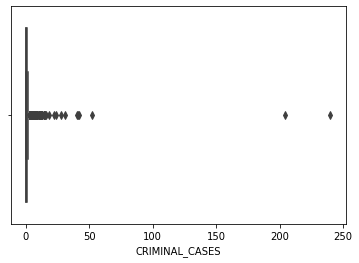

In [30]:

sns.boxplot(x=finaldf['CRIMINAL_CASES'])

Here we can clearly observe that, the two values over 200, adversely affect the dataframe. So our best option would be to drop columns which contain them. We can either delete them or reset them to some  other value. 

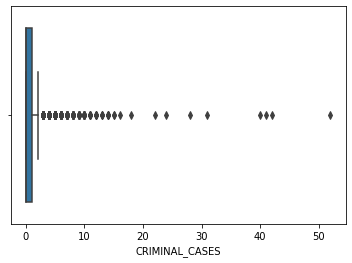

In [31]:
#here we filter dataset to contain only values where name is not NOTA. Also we reset the index to fit the newdataset
finaldf = finaldf[finaldf['CRIMINAL_CASES']<200].reset_index(drop=True)

sns.boxplot(x=finaldf['CRIMINAL_CASES'])

In [32]:
print('Number of Rows    : \t ', str(finaldf.shape[0])+'\n'+'Number of Columns : \t ', str(finaldf.shape[1]))

Number of Rows    : 	  2016
Number of Columns : 	  7


So we can confirm that two values got deleted

Other step was to change values based on a condition rather than deleting : More on that at [link text](https://kanoki.org/2019/07/17/pandas-how-to-replace-values-based-on-conditions/)




```
df.loc[(df.Column == 'toreplace'),'column']='new'
```




Though not optimal this seems like a healthy fitting of data. 

FYI, 50 cases, is a data normal with indian politicians and so that not considered as a outlier

In [33]:
finaldf.describe()

,AGE,CRIMINAL_CASES,VOTERS_TURNAROUND,WINNER
count,2016.000000,2016.000000,2016.000000,2016.000000
mean,52.282738,1.235119,25.773313,0.266865
std,11.870159,3.119820,21.419657,0.442431
min,25.000000,0.000000,1.000000,0.000000
25%,43.750000,0.000000,3.000000,0.000000
50%,52.000000,0.000000,28.000000,0.000000
75%,61.000000,1.000000,44.000000,1.000000
max,86.000000,52.000000,74.000000,1.000000


We observe that this brings balance to our dataset and our dataset is good to go for next analysis


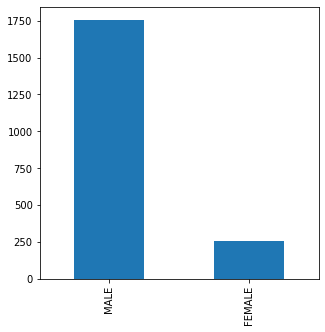

In [34]:
#plotting gender value plot 
finaldf["GENDER"].value_counts().plot(kind='bar',figsize=(5,5))

3.



> Create scatter plots of pairs of variables that you think might be related, and for two such plots do the following:
Explain why you think the two variables might be related
Show the scatter plot
Explain what the plot says, if anything, about the relationship between the variables. The explanation should be semantic. That is, don't say "x gets bigger when y gets bigger", say, for example, "it looks like crime increases later in the week, presumably because people are out later in the week and on the weekends".
Note that you do not need to plot all pairs of variables. In fact, you can do just two pairs as long as they show interesting relationships.



---



References for plots are taken from [Seaborn website](https://seaborn.pydata.org/generated/seaborn.catplot.html)

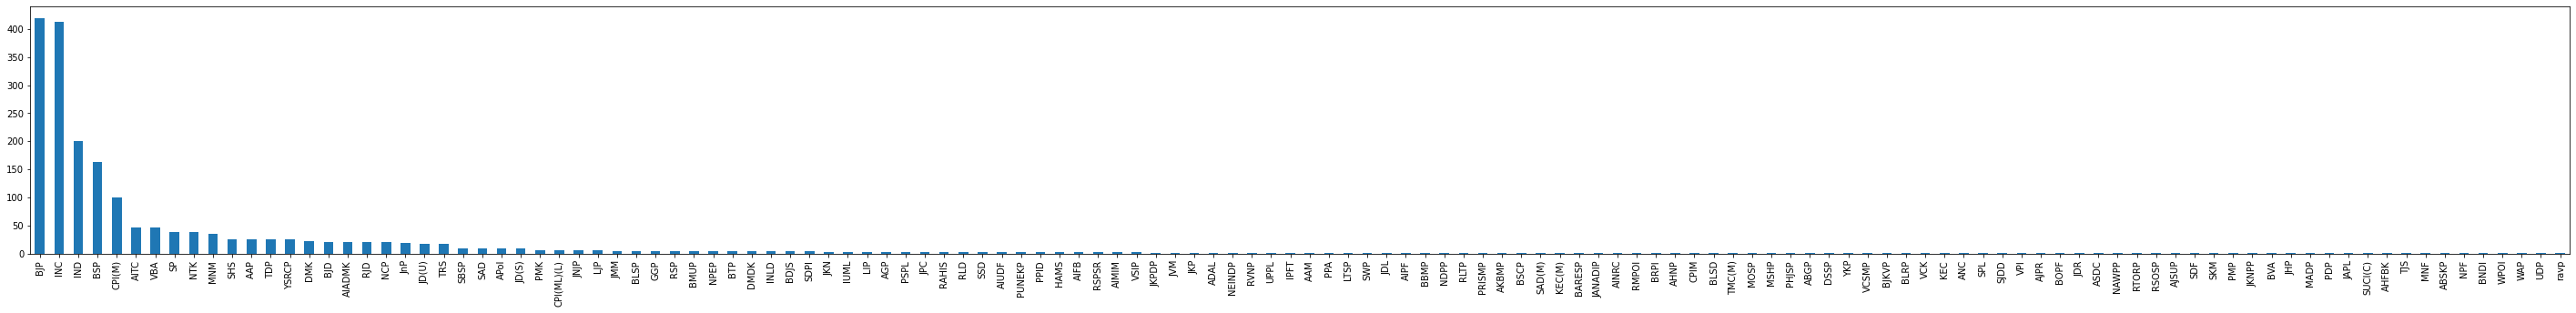

In [35]:
finaldf.PARTY.value_counts().plot(kind='bar',figsize=(50,5))

We have that a lot of parties in the PARTY column which creates a significant issue in visualization and even for analysis.

What we know about Indian politics is that, other than the predominant top 10 parties, other parties don't have that huge hold over constituency and account for at the most single digit candidates, which hardly affects the end result. 

So what we can do here is first we group parties by the winner column value. And then we sort it as ascending and take top 10 values of PARTY column.

In [36]:
top = finaldf
top_P = top[['PARTY','WINNER']].groupby('PARTY').sum().sort_values('WINNER', ascending = 0).reset_index()
top_P[0:10].PARTY.values


array(['BJP', 'INC', 'DMK', 'AITC', 'YSRCP', 'SHS', 'JD(U)', 'BSP', 'BJD',
       'TRS'], dtype=object)

We create a function which changes, all other parties than top 10 to 'Other' as value and drop the old party column

In [37]:
def update_PARTY(row):
    if row['PARTY'] in ['BJP', 'INC', 'DMK', 'AITC', 'YSRCP', 'SHS', 'JD(U)', 'BSP', 'BJD',
       'TRS']:
        return row['PARTY']
    else:
        return 'OTHERS'
        
finaldf['PARTY_UPDATED'] = finaldf.apply(update_PARTY,axis =1)

finaldf = finaldf.drop('PARTY',axis=1)


Our plot now is more better to visualize

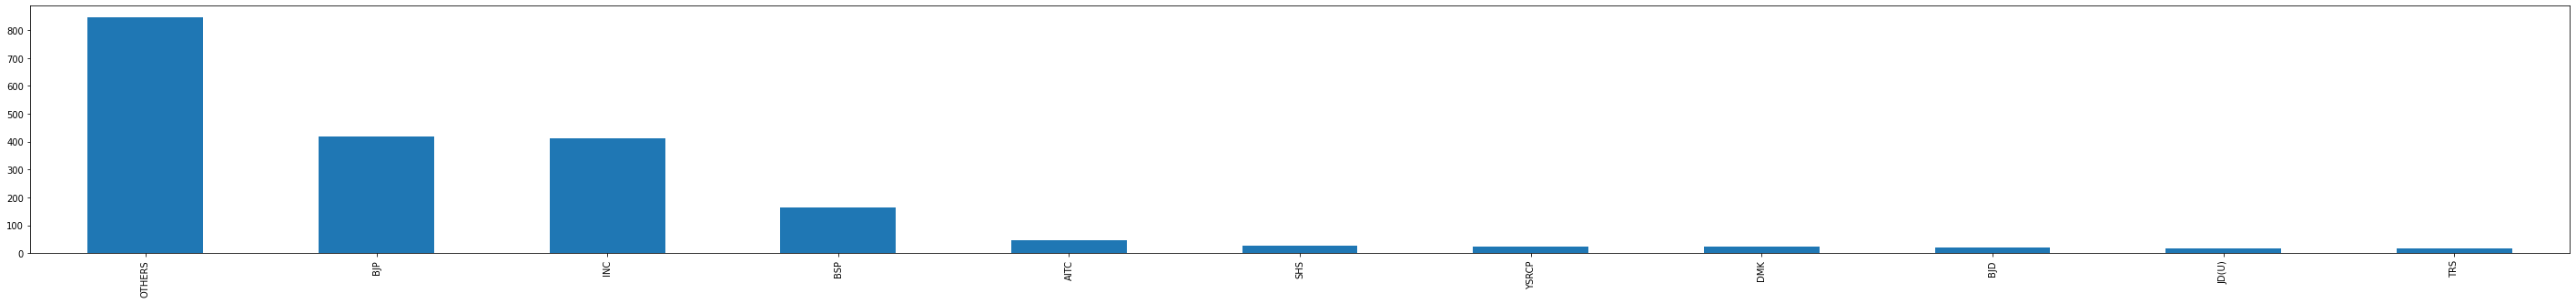

In [38]:
finaldf.PARTY_UPDATED.value_counts().plot(kind='bar',figsize=(50,5))

We do the same for education, so that we have better visualization.

We set levels of education, and assign the number as a float value, we do this so to deal with some issues that pop up in plotting where one value of x or y variable needs to be numeric.

This we classsify education as:

Level 0 = 'Illiterate'

Level 1 = 'Literate'

Level 2 = '5th Pass','8th Pass','10th Pass','12th Pass'

Level 3 = 'Graduate Professional','Graduate'

Level 4 = 'Post Graduate', 'Doctorate'

In [39]:
def update_education(row):
    if row['EDUCATION'] in ['Illiterate']:
        return 0.0
    if row['EDUCATION'] in ['5th Pass','8th Pass','10th Pass','12th Pass']:
        return 2.0
    elif row['EDUCATION'] in ['Graduate Professional','Graduate']: 
        return 3.0
    elif row['EDUCATION'] in ['Post Graduate', 'Doctorate']:
        return 4.0
    else:
        1.0
        
finaldf['EDUCATION_UPDATED'] = finaldf.apply(update_education,axis =1)
finaldf = finaldf.drop('EDUCATION',axis=1)


In [40]:
finaldf

,AGE,GENDER,CRIMINAL_CASES,VOTERS_TURNAROUND,WINNER,PARTY_UPDATED,EDUCATION_UPDATED
0,52,MALE,52,35,1,BJP,2.0
1,54,MALE,0,30,0,TRS,4.0
2,52,MALE,3,30,0,INC,2.0
3,58,MALE,5,56,1,BJP,4.0
4,47,MALE,0,38,0,BSP,4.0
...,...,...,...,...,...,...,...
2011,28,FEMALE,0,2,0,OTHERS,2.0
2012,43,MALE,0,1,0,OTHERS,4.0
2013,63,MALE,18,42,1,TRS,3.0
2014,49,MALE,0,41,0,INC,4.0


For first values, We aim to see what is the education level of candidates of a particular party. With a scatter plot we can see which party prefers literate candidates. 

This is an huge issue in Indian democracy, where a lot of top level politicians are found to be illeterate in the sense of formal schooling. Later we will check to see how many of this party only consider people with graduate and higher education.

<Figure size 1080x360 with 0 Axes>

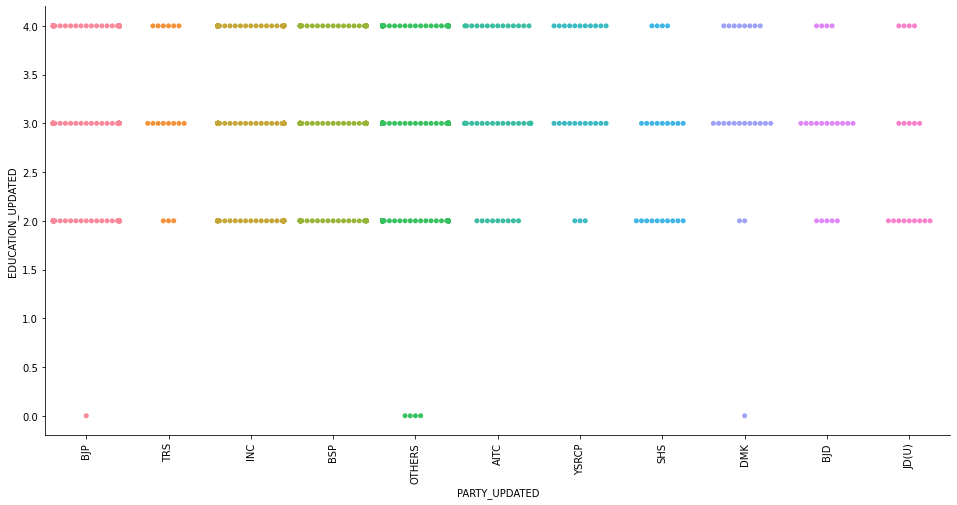

In [41]:
plt.figure(figsize=(15,5))

chart = sns.catplot(x="PARTY_UPDATED", y="EDUCATION_UPDATED", kind="swarm", data=finaldf,height=6.7,aspect=2);
chart.set_xticklabels(rotation=90)

What we observe is certainly suprising, most of the top 10 PARTY's had candidates having atleast basic schooling(Level 2: School/College and above).

Candidates, from not so popular parties hardly had accounted for most Illiterate candidates, Top parties like BJP and DMK too had some candidates from Illiterate category(Level 0).

With BJP having the most candidates in field, this is justified to have some candidates without schooling.

A major inference that can thus be asserted is that Parties are taking education level seriously and thus that can certainly be a deciding factor for winning.




<Figure size 1080x360 with 0 Axes>

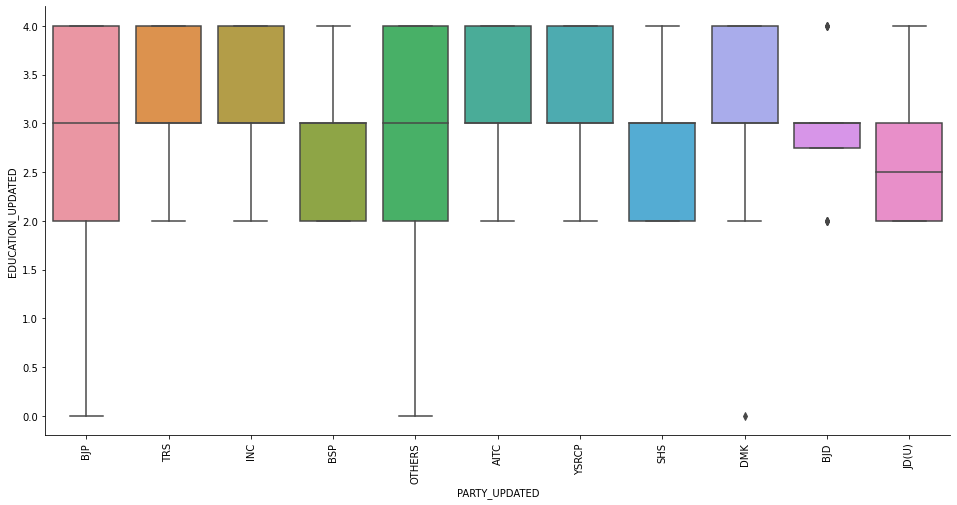

In [42]:
plt.figure(figsize=(15,5))

chart = sns.catplot(x="PARTY_UPDATED", y="EDUCATION_UPDATED", kind="box", data=finaldf,height=6.7,aspect=2);
chart.set_xticklabels(rotation=90)

This box plot, shows further that, education level above 2 was mostly considered by most of the Party's. 

Next, lets check how the level of education affects the winner percentage

<Figure size 1080x360 with 0 Axes>

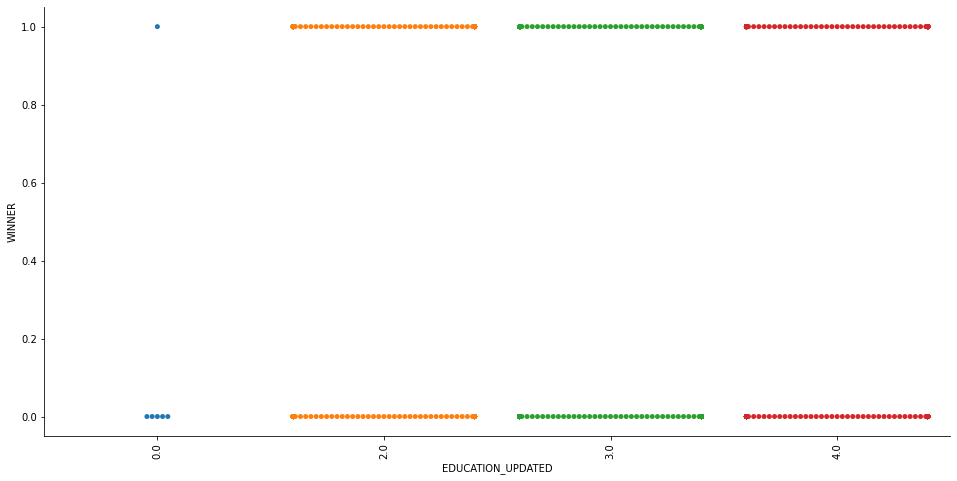

In [43]:
plt.figure(figsize=(15,5))

chart = sns.catplot(x="EDUCATION_UPDATED", y="WINNER", kind="swarm", data=finaldf,height=6.7,aspect=2);
chart.set_xticklabels(rotation=90)

We observe that there is not much difference that can be observed as the education level changes, It almost seems that it is equally distributed. And no particular Education level(above level 2 of basic schooling) affects the changes of winning. 

But one thing that we could confirm is that, education level under 2, lead to more loss in Elections. This seems like a factor that the PARTY's are aware of, particularly since they field in more of Level 2 and above candidates.

<Figure size 1080x360 with 0 Axes>

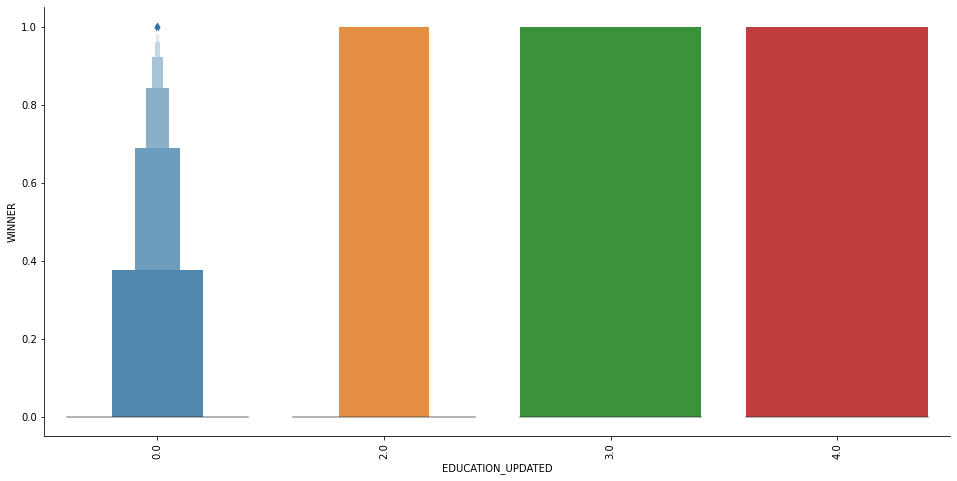

In [44]:
plt.figure(figsize=(15,5))

chart = sns.catplot(x="EDUCATION_UPDATED", y="WINNER", kind="boxen", data=finaldf,height=6.7,aspect=2);
chart.set_xticklabels(rotation=90)

This boxen plot confirms our exploration, and goes on to show that, even for Level 2 education, there were more losses than winnings, so, certainly education does matter in winning chances. 
Level 3 and 4 show a equal ratio.

<Figure size 72x72 with 0 Axes>

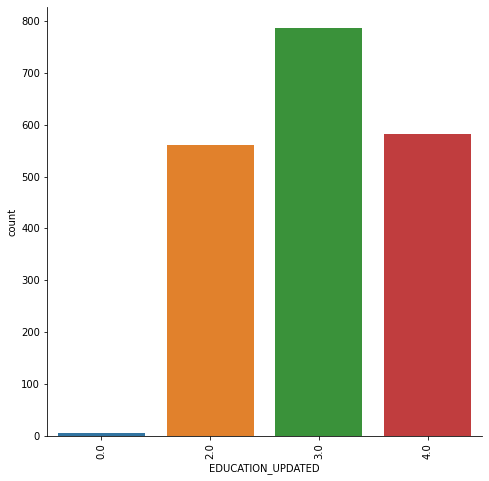

In [45]:
#just to see how many individuals are present in each level of education
plt.figure(figsize=(1,1))

chart = sns.catplot(x="EDUCATION_UPDATED", kind="count", data=finaldf,height=6.7);
chart.set_xticklabels(rotation=90)

4.

> Pick one variable to be a dependent variable, and two others to be predictor variables. 
These choices should be based on your exploration above. 
Generate a 2-D or 3-D plot that shows whether the predictor variables actually convey information about the value of the dependent variable.
That is, is it the case that knowing the value of the predictor variables gives you information about the dependent variable.
Explain clearly why you think they do or do not by referring to the plot.







From above exploration, its clear that,even after education level goes above level 2(and for most cases even level 2), the winning depends largely on the PARTY the candidate is affiliated with. 

Lets explore more on this,

Lets take, PARTY and EDUCATION as our primary predictor variables. On basis of this two, lets see if we can predict Winning chances

<Figure size 1080x360 with 0 Axes>

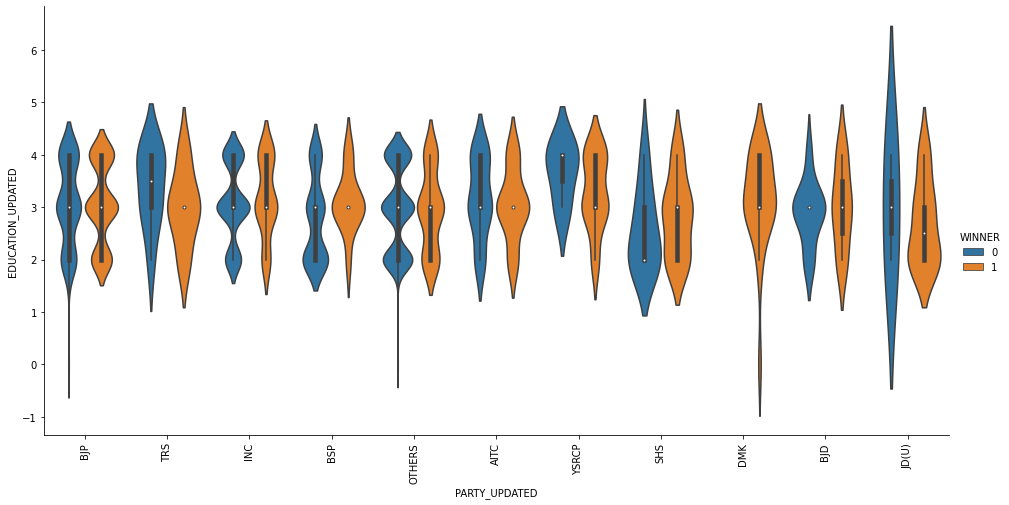

In [46]:
plt.figure(figsize=(15,5))

chart = sns.catplot(x="PARTY_UPDATED", y="EDUCATION_UPDATED", kind="violin",hue = 'WINNER', data=finaldf,height=6.7,aspect=2,jitter=0.25);
chart.set_xticklabels(rotation=90)

Above, We printed a voilin plot with hue as our winning chances, 0 for loss and 1 for win. From the distribution above, it is evident that, for the top parties cases, education level was was almost average at level 3 for both winning and lossing candidates. 

There were cases where less education level(less as in at level 2), lead to a loss, as in for SHS and BSP partys, where education level of those lost was at level 2, so SHS and BSP partys can improve on that for later elections. 

At the same time for TRS and YSRCP, education level at top also saw losses. This has to do more with the Party being not so dominant. 

We also observe that party at DMK has all winners, with the education level averaginf at above level 3. So certainly upcoming and educated parties are taking the lead and soon with optimal stratergies can form a winning plan.

<Figure size 1080x360 with 0 Axes>

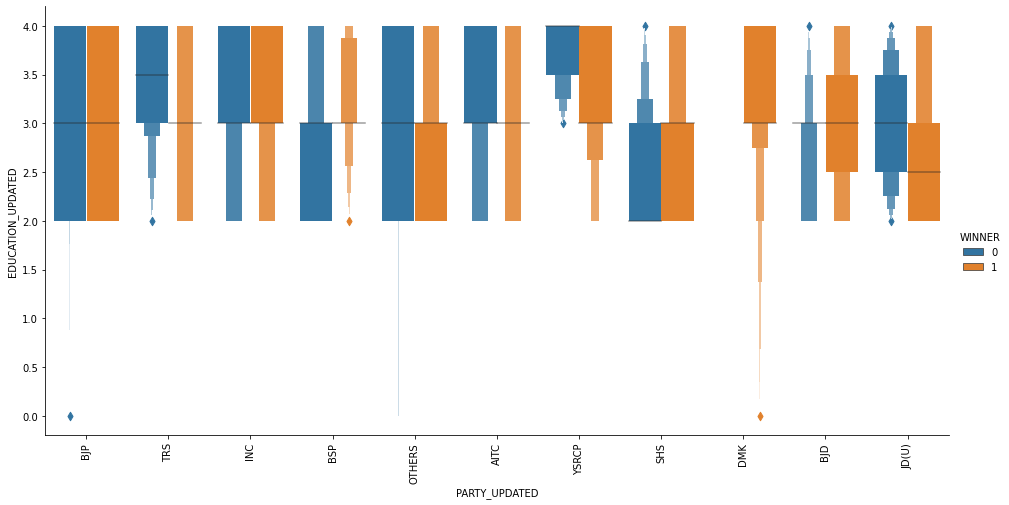

In [47]:
plt.figure(figsize=(15,5))

chart = sns.catplot(x="PARTY_UPDATED", y="EDUCATION_UPDATED", kind="boxen",hue = 'WINNER', data=finaldf,height=6.7,aspect=2);
chart.set_xticklabels(rotation=90)

The boxen plot with the same predictors and dependent value above shows a similar case as our earlier inference, not much can be directly predicted using just EDUCATION as a variable. 

Dominance of Party's is more to do with winning chances than the education level. 

As in for BJP above, the average of both the winning and losing candidates was at level 3 of education, which is the same for most of the top 10 partys and even for all the other parties grouped together. 
BJP has people who won at level 2 and above, its candidates with education under level 2 lost the elections. 

The same follows for other top PARTYs like INC too. 


With the grouped other parties(smaller ones), its evident that most candidates of those who won are the educated ones, with education level over level 2. 

With that in mind, a small inference can be that, having a education above Schooling and College level(Level 2) helps in the election. Though it is not a big deciding factor and choosing the right Party matters a lot, especially with the Indian political system. 

So incase we need to come up with better analysis or prediction algorithms, we certainly need to consider the other columns too, as they would help put extract better knowledge of the election data. With the various categorical data we have in hand Decisions Tree models should be a better fit, but that is for further analysis.